#### 4/24/2017

This notebook contains the output for the FB100 dataset and Add Health School figures, after running the scripts 'c\_....py' in the code file

In [17]:
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os

os.chdir('/Users/kristen/Documents/gender_graph_code/code/0_analyze_FB100_AddHealth/')

## relevant libraries
execfile('../functions/python_libraries.py')

# Load FB100 dataset

In [12]:
fb_file = '/Users/kristen/Dropbox/gender_graph_data/manuscript/pnas/pnas_output_data/'
fb = pd.read_csv(fb_file+'facebook_output_majority_vote.csv')
fb_homophily_monophily = pd.read_csv(fb_file+'facebook_homophily_monophily_output_updated.csv')
schools = np.array(['Wellesley22', 'Smith60', 'Simmons81'])
fb_subset = fb[~np.in1d(fb.school,schools)] #%in% schools
fb_hom_mon_subset = fb_hom_mon[~np.in1d(fb_hom_mon.school,schools)] #%in% schools



In [7]:
fb_final = fb_subset.merge(fb_homophily_monophily, 
                left_on='school', right_on='school', how='outer')
#print fb_final

/Users/kristen/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


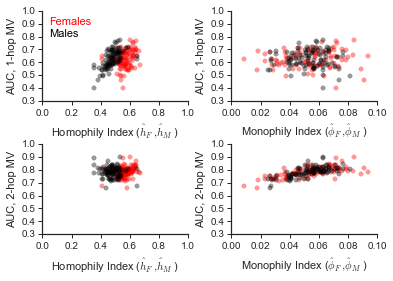

In [8]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import Grid
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

alpha_parameter = 0.4
fig = plt.figure()

grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.6, label_mode='all',
           share_all=False)
y_min = 0
y_max = 250
xlabel_block = 0.69 *100
label_loc1 = 200
label_loc2 = 170


for i in range(4):
    grid[i].tick_params('both', length=4, width=1, 
                        which='major', left=1, bottom=1, top=0, right=0)

    if i == 0: 
        grid[i].scatter(fb_final.cc_homophily_F,fb_final.ix[:,2],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_final.cc_homophily_M,fb_final.ix[:,2],
                     alpha = alpha_parameter, 
                    color='black')

        grid[i].set_ylim(0.3,1)
        grid[i].set_ylabel('AUC, 1-hop MV')
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_xlim(0,1)
        grid[i].set_xlabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)')
        grid[i].annotate('Females', xy=(0.05,0.9), 
                 color='red', alpha=1, size=11)
        grid[i].annotate('Males', xy=(0.05,0.8), 
                 color='black', alpha=1, size=11)



    if i == 1:
        grid[i].scatter(fb_final.cc_monophily_F,fb_final.ix[:,2],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_final.cc_monophily_M,fb_final.ix[:,2],
                     alpha = alpha_parameter, 
                    color='black')

        #grid[i].set_ylim(0.3,1)
        #grid[i].set_xlim(0.3,0.2)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_ylabel('AUC, 1-hop MV')
        grid[i].set_xlabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)')


    if i == 2:
        grid[i].scatter(fb_final.cc_homophily_F,fb_final.ix[:,4],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_final.cc_homophily_M,fb_final.ix[:,4],
                     alpha = alpha_parameter, 
                    color='black')
        grid[i].set_ylabel('AUC, 2-hop MV')
        grid[i].set_ylim(0.3,1)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].set_xlabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)')
        #grid[i].set_xlim(0,0.1)
    if i == 3:
        grid[i].scatter(fb_final.cc_monophily_F,fb_final.ix[:,4],
                     alpha = alpha_parameter, 
                    color='red')
        grid[i].scatter(fb_final.cc_monophily_M,fb_final.ix[:,4],
                     alpha = alpha_parameter, 
                    color='black')
        grid[i].set_xlim(0,0.1)
        grid[i].set_ylim(0.3,1)
        grid[i].set_ylabel('AUC, 2-hop MV')
        grid[i].set_xlabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)')

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)

#plt.tight_layout()
pp = PdfPages('../../figures/FB100_hom_mon_majority_vote.pdf')
pp.savefig()
pp.close()

In [9]:
color_F = 'red'
color_M = 'black'

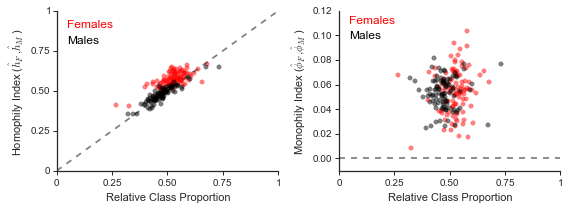

In [19]:
## combine figures
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, 
                             sharey=False, sharex=True,
                            figsize=(8, 3))

ax1.plot( [0,1],[0,1] ,'k--',alpha=0.5)
ax1.xaxis.set_major_locator(FixedLocator([0,0.25,0.50,0.75,1]))
ax1.yaxis.set_major_locator(FixedLocator([0,0.25,0.50,0.75,1]))

plt.setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])
plt.setp(ax1, yticks=[0,0.25, 0.5, 0.75, 1], yticklabels=['0', '0.25', '0.50', '0.75', '1'])




ax1.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_homophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=0.5)
ax1.annotate('Females', xy=(0.05,0.9), 
                 color=color_F, alpha=1, size=12)


ax1.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_homophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=0.5)
ax1.annotate('Males', xy=(0.05,0.8), 
                 color=color_M, alpha=1, size=12)

ax1.set_ylabel('Homophily Index ($\hat{h}_F, \hat{h}_M$)')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlabel('Relative Class Proportion')
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)




ax2.plot( [0,1],[0,0] ,'k--',alpha=0.5)
ax2.xaxis.set_major_locator(FixedLocator([0,0.25,0.50,0.75,1]))



ax2.scatter(fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_F>0],
           fb_hom_mon_subset.cc_monophily_F[fb_hom_mon_subset.cc_average_degree_F>0],
            color=color_F,alpha=0.5)
ax2.annotate('Females', xy=(0.05,0.11), 
                 color=color_F, alpha=1, size=12)

ax2.annotate('Males', xy=(0.05,0.098), 
                 color=color_M, alpha=1, size=12)

ax2.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)



ax2.scatter(1-fb_hom_mon_subset.ratio_F[fb_hom_mon_subset.cc_average_degree_M>0],
           fb_hom_mon_subset.cc_monophily_M[fb_hom_mon_subset.cc_average_degree_M>0],
           color=color_M,alpha=0.5)

ax2.set_ylabel('Monophily Index ($\hat{\phi}_F, \hat{\phi}_M$)')
ax2.set_xlabel('Relative Class Proportion')
ax2.set_xlim(0,1)
ax2.set_ylim(-0.01,0.12)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)


#plt.set_setp(ax1, xticks=[0,0.25, 0.5, 0.75, 1], xticklabels=['0', '0.25', '0.50', '0.75', '1'])


#f.text(0.5, 0.01, 'Relative Class Proportion', ha='center',size=10)
#plt.ylim(0,1)
plt.tight_layout()
#plt.show()
#f.text(0.5, 0.95, 'Homophily and Monophily Across FB100 Schools', ha='center',size=10)
pp = PdfPages('../../figures/Facebook_homophily_monophily_versus_class_proportion.pdf')
pp.savefig()
pp.close()